<a href="https://colab.research.google.com/github/testUNECE/template/blob/master/2_Data_preparation_revised_version_14_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Data preparation


In coding and classification (C&C), raw data are text descriptions written in natural language and these text data should be converted into numbers as ML models expect input data to be in numeric format. 

One of popular approaches of converting text into numbers is called <b> Bag of Words</b>. Bag of Words approach first creates a "bag" from unqiue words that appear in the texts. Each text is then represented as a vector of numbers where each number represent how often corresponding word appears in the text. For example, imagine occupation descriptions provided by four survey respndents: 

*   Text A : "I drive a taxi" 
*   Text B : "I am driving taxi."
*   Text C : "restaurant chef"
*   Text D : "I cook at a resturant"

Bag of words from these four texts will contain 12 (unique) words as: ["i", "drive", "a", "taxi", "am", "driving", "taxi.", "Professional", "chef", "cook", "at", "restaurant"]. Using a simple binary <b>scoring method</b> where 1 represents occurence, 0 represents absence, each text can be converted to a 1 x 12 vector where each element corresponds to a word in the bag as:

<table >
<tbody>
  <tr>
    <td> </td> <td> "I"  </td> <td> "drive"  </td> <td> "a"  </td> <td> "taxi" </td> <td> "am"  </td> <td> "driving"  </td> <td> "taxi." </td> <td> "restaurant" </td> <td> "chef"  </td> <td> "cook"  </td> <td> "at"  </td>
  </tr>
  <tr>
    <td> Text A </td> <td> 1 </td> <td> 1  </td> <td> 1  </td> <td> 1  </td> <td> 0  </td> <td> 0 </td> <td> 0 <td> 0  </td> <td> 0 </td> <td> 0 <td> 0  </td>
  <tr>
    <td> Text B </td> <td> 1 </td> <td> 0  </td> <td> 0 </td> <td> 0  </td> <td> 1 </td> <td> 1 </td> <td> 1 <td> 0  </td> <td> 0 </td> <td> 0 <td> 0  </td> 
  <tr>
    <td> Text C </td> <td> 0 </td> <td> 0  </td> <td> 0  </td> <td> 0  </td> <td> 0  </td> <td> 0 </td> <td> 0 <td> 1  </td> <td> 1 </td> <td> 0 <td> 0  </td> 
  <tr>
    <td> Text D </td> <td> 1 </td> <td> 0  </td> <td> 1  </td> <td> 0  </td> <td> 0  </td> <td> 0 </td> <td> 0 <td> 1 </td> <td> 0 </td> <td> 1 <td> 1  </td> 
  </tr>
</tbody>
</table>

## 2.1 Text preprocessing
---
<b>2.1.1 Tokenization</b>

The above example shows a typical way of storing text data where each input is a sentence. In order to create vector space for a bag-of-words model, tokenization is invoked to break up a sentence into words called tokens or grams. For example:

* Text A : "I drive a taxi" ----> ["I", "drive", "a", "taxi"]

When considering two consecutive words as an element of the vocabulary set, the model is called bi-gram model. Model built on single word is called uni-gram model. For any n-gram model for which n is greater than or equal to 2, the context/order of words is taking into account. For example:

* Text E: "A belongs to B."
* Text F: "B belongs to A. "

After removing punctuation, a set of uni-grams is ["A","belongs", "to", "B"]. Uni-gram model cannot distiguish the difference between these two sentences because the vector assigned to both of them are the same:

<table >
<tbody>
  <tr>
    <td> </td> <td> "A"  </td> <td> "belongs"  </td> <td> "to"  </td> <td> "B"  </td> 
  </tr>
  <tr>
    <td> Text E </td> <td> 1 </td> <td> 1  </td> <td> 1  </td> <td> 1  </td> 
  <tr>
    <td> Text F </td> <td> 1 </td> <td> 1  </td> <td> 1 </td> <td> 1  </td> 
  </tr>
</tbody>
</table>

A bi-gram solves this issue because it produces a two-words vocabulary set: ["A belongs", "belongs to", "to B", "B belongs", "to A"]. The vector represetnation of these two sentences are different:

<table >
<tbody>
  <tr>
    <td> </td> <td> "A belongs"  </td> <td> "belongs to"  </td> <td> "to B"  </td> <td> "B belongs"  </td> <td> "to A"  </td> 
  </tr>
  <tr>
    <td> Text E </td> <td> 1 </td> <td> 1  </td> <td> 1  </td> <td> 0  </td> <td> 0 </td>
  <tr>
    <td> Text F </td> <td> 0 </td> <td> 1  </td> <td> 0 </td> <td> 1  </td> <td> 1 </td>
  </tr>
</tbody>
</table>

<b>2.1.2 Normalization</b> 

Texts written by human often contain pieces of information that doesn't contribute much to classification. For example, punctuation as in "taxi." can be removed so that machine does not consider it as different from "taxi" just due to punctuation. Similarly, "restaurant" is essentially the same as "a restaurant". "an apple" and "six apples" provides same information when classifying the category of food.

Several text normalization methods can be applied to clean the data before creating bag-of-words model:

* <b>Convert to lower case</b>: Most programming languagues (including python that is used in working example) are case-sensitive. A word "taxi" is differentiated from  "Taxi" even though they are essentially the same. When creating a bag of words , the . 
* <b>Stemming/lemmatization</b>: words can vary depending on quantity/subject/tense (e.g. "apples" is plural form of "apple", "drove" is past tense of "drive"). Both stemming and lemmatization attempt to reduce variation of words by keeping only the root form. While stemming cuts out the inflectional affix of words (e.g. "drive" is cut to "driv"). INEGI has developed their own dictionary with synonyms that can be used for lemmatization [ref_INEGI].
* <b>Remove stop words</b>: Stop words is a set of word that so commonly appear that do not add value to distinguish one text from another (e.g. articles "a", "an", "the"). NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. Documentation can be found here: https://github.com/mitmedialab/DataBasic/tree/master/nltk_data/corpora/stopwords

<b>2.1.3 Noise Removal</b>

Noise removal is a domain dependant or a task speficic cleaning process. Depending on the task assigned, the noise takes different forms. Raw data extracted from a website contains html tags, while data from a file/document/pdf usually has header and footer. 

Within a sentence, noise could be punctuation marks (e.g. comma, period point, question mark, exclamation mark), special characters, and numbers. 

<b>*Example*</b>

Following table shows how Text A and Text B are simplified after all preprocessings are applied:
<table >
<tbody>
  <tr>
    <td> </td>
    <td> Text A </td>
    <td> Text B </td>
  </tr> 
  <tr>
    <td>  Original text  </td>
    <td><b> I drive a taxi. </b></td>
    <td><b> I am driving Taxi</b> </td>
  </tr>
  <tr>
    <td>  After tokenization  </td>
    <td> "I", "drive", "a", "taxi", "." </td>
    <td> "I", "am", "driving", "Taxi" </td>
  </tr>
  <tr>
    <td> After removing noise </td>
    <td> "I", "drive", "a", "taxi" </td>
    <td> "I", "am", "driving", "Taxi" </td>
  </tr>
  <tr>
    <td> After converting to lower case </td>
    <td> "i", "drive", "a", "taxi" </td>
    <td> "i", "am", "driving", "taxi" </td>
  </tr>
  <tr>
    <td> After stemming </td>
    <td> "i", "driv", "a", "taxi" </td>
    <td> "i", "am", "driv", "taxi" </td>
  </tr>
  <tr>
    <td> After removing stop words </td>
    <td> <b> "driv", "taxi"</b> </td>
    <td> <b> "driv", "taxi"</b> </td>
  </tr>
  </tbody>
  </table>

<b>*Note*</b>

The order of performing normalization and noise removal depends on the text data and the problem to be solved. Sometimes tokenization and normalization can happen at the same point.

While it is common practice to at least converting to lower case and removing noise, and lemmatization and stemming occurs in practice, it is not mandatory to use all  preprocessing methods listed above. 






## 2.2 TF-IDF
---
When introducing bag-of-words model, we adopt a simple scoring method utilizing binary vector representation of occurence and absence. 

A more sophisticated model is built upon the frequency of the word, <b>term frequency</b>, in the document. Think about words that have no semantic value such as "the", "an" and other so-called stop words that occur frequently in most documents, these words should rank low. This is adjusted by <b>inverse document frequency</b> from which the rarer the word is, the lower the value is assigned. <b>TF-IDF</b>, term frequency-inverse document frequency, is a common metric resulting from multiplying these two scores together. 

In Python sklearn library, tfidf is calculated by either using *TfidfVectorizer()* or a combination of *CountVectorizer()* and *TfidfTransformer()*.

<b>*Note*</b>

In addition to word relevance in the document, *TfidfVectorizer()* module takes care of most of the text preprocessing steps, for instance, tokenization, stop words removal, lowercase conversion and the range of n for n-gram models.






## Parking lot


Note that in above example, few keywords associated with certain categories are easily identifiable, hence rule-based system such as "if a text contains word X, classify the occupation as Y" could also classfy texts. However, such identification of keywords require human intervention and when the size of categories becomes large (e.g. Standards Occupation has xxxx categories), it is very difficult to maintain the rule-based system because the keywords would have considerable overlap.



data set - search for other programmes/departments in the organisation that use the same classification system. For example, occupation C&C occurs not only in LFS but also.. (reference to Canada case) 


https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html

## 2.3 Working example using ECOICOP data
---
ECOICOP refers to the European Classification of Individual Consumption according to Purpose which provides homogeneous categories of goods and is used for surveys such as Household Budget surveys (HBS), Price Statistics (HICP) and Purchasing Power Parities (PPP) [ref_ECOICOP_Eurostat]. 

Statistics Poland provides a dataset with 17,099 products web-scrapped from three online shops and coded with ECOICOP categories as open dataset [ref_ECOICOP_Poland]. The dataset contains data in Polish (original), English and French and is freely available in [ref_ECOICOP_dataset].

For the purpose of demonstration, only English data is analyzed in this learning material.

> Python has numerous packages, here we load python libraries and packages.


In [0]:
# Import data
import pandas as pd
# Python library for graphs
import matplotlib.pyplot as plt
# Python library for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Compute chi-squared stats between each non-negative feature and class
from sklearn.feature_selection import chi2
# Python library for scientific computing
import numpy as np

> Dataset is saved under the name "df". 

In [0]:
# Import excel file on github
df = pd.read_excel('https://raw.githubusercontent.com/UNECE/ML_dataset/master/Stats%20Poland%20ECOICOP%20data.xlsx', sheet_name = 'Data')

> Check the dimension (17099 rows and 6 columns) of the dataset.

In [0]:
# Shows the dimension (row, column) of the dataset
df.shape 

(17099, 6)

>  Examine if the dataset is loaded correclty by checking few lines of dataset. 'Desc_E' is the product name in English, 'Code_E' is the category manually coded in English. For example, 'Peach Porridge' is categorized as 'Other dairy products', 'Potato salad Polish cuisine' is categorized as 'potatoes'.

In [0]:
# Shows the first 5 rows of the dataset  
df.head(5) 

,Desc_P,Code_P,Desc_E,Code_E,Desc_F,Code_F
0,owsianka brzoskwiniowa,Pozostałe produkty mleczne,Peach Porridge,Other dairy products,Bouillie de pêche,Autres produits laitiers
1,Owsianka Truskawkowa Mlekovita,Pozostałe produkty mleczne,Mlekovita Strawberry Porridge,Other dairy products,Bouillie de fraises Mlekovita,Autres produits laitiers
2,Owsianka wiśniowa,Pozostałe produkty mleczne,Cherry Porridge,Other dairy products,Bouillie de cerise,Autres produits laitiers
3,Owsianka Truskawkowa Mlekovita,Pozostałe produkty mleczne,Mlekovita Strawberry Porridge,Other dairy products,Bouillie de fraises Mlekovita,Autres produits laitiers
4,sałatka z batatów,Pozostałe warzywa bulwiaste i przetwory z warz...,sweet potato salad,Other tuber vegetables and preparations of tub...,salade de patates douces,Autres légumes à légumes et préparations à bas...


> Check how many ECOICOP categories (61 different groups) are in the dataset.

In [0]:
# Get the number of different categories
len(df['Code_E'].unique())

61

> Create a bar chart to see how many records are under each category.


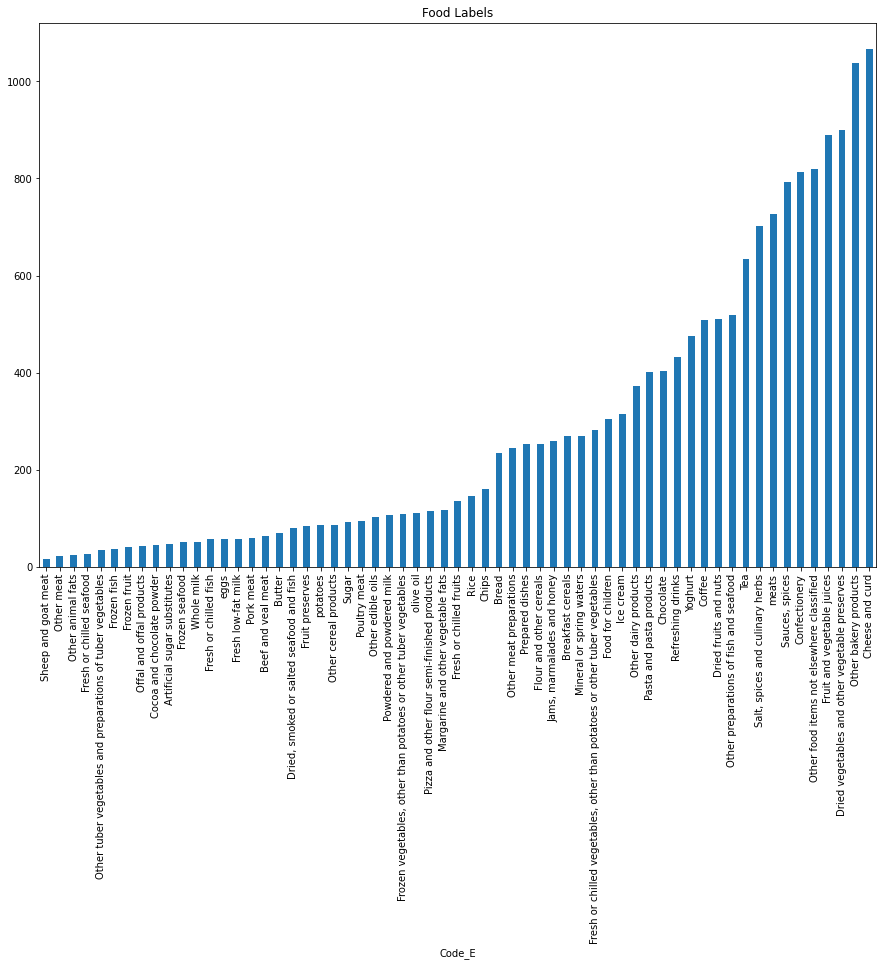

In [0]:
# Plot the dataset grouped by ECOICOP code
fig = plt.figure(figsize = (15,10)) 
df.groupby('Code_E').Desc_E.count().sort_values().plot.bar(ylim = 0)
plt.title('Food Labels')
plt.show()

> Remove Noise

In [0]:
# Remove numbers
def remove_numbers(a):
  return ''.join([i for i in a if not i.isdigit()])

for i, row in df.iterrows():
  row['Desc_E'] = remove_numbers(row['Desc_E'])

> Create TF-IDF 

In [0]:
# Transform food description to tf-idf vector
# ngram_range = (1,2) considers both uni-gram and bi-gram models
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))
x_tfidf = tfidf_vect.fit_transform(df['Desc_E'])
# Each description of food is represented by 36810 number of features.
x_tfidf.shape

(17099, 36810)

> Find terms that are most relevant for each food. 

In [0]:
df['Class_E'] = df['Code_E'].factorize()[0]
class_df = df[['Code_E', 'Class_E']].drop_duplicates().sort_values('Class_E')
class_to_id = dict(class_df.values)
id_to_class = dict(class_df[['Class_E', 'Code_E']].values)
df.head()
x = x_tfidf.toarray()
y = df['Class_E']
N = 2
for Code_E, Class_E in sorted(class_to_id.items()):
  x_chi2 = chi2(x, y == Class_E)
  indices = np.argsort(x_chi2[0])
  x_names = np.array(tfidf_vect.get_feature_names())[indices]
  unigrams = [word for word in x_names if len(word.split(' ')) == 1]
  bigrams = [word for word in x_names if len(word.split(' ')) == 2]
  print("# '{}':".format(Code_E))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Artificial sugar substitutes':
  . Most correlated unigrams:
. tablets
. sweetener
  . Most correlated bigrams:
. table sweetener
. sweetener based
# 'Beef and veal meat':
  . Most correlated unigrams:
. beef
. steak
  . Most correlated bigrams:
. beef jerky
. dried beef
# 'Bread':
  . Most correlated unigrams:
. roll
. bread
  . Most correlated bigrams:
. rye bread
. bread with
# 'Breakfast cereals':
  . Most correlated unigrams:
. muesli
. flakes
  . Most correlated bigrams:
. breakfast cereal
. corn flakes
# 'Butter':
  . Most correlated unigrams:
. 82
. butter
  . Most correlated bigrams:
. butter extra
. extra butter
# 'Cheese and curd':
  . Most correlated unigrams:
. cottage
. cheese
  . Most correlated bigrams:
. cream cheese
. cottage cheese
# 'Chips':
  . Most correlated unigrams:
. lay
. chips
  . Most correlated bigrams:
. lay 39
. potato chips
# 'Chocolate':
  . Most correlated unigrams:
. lindt
. chocolate
  . Most correlated bigrams:
. chocolate with
. milk chocolate



## Reference


[ref_INEGI] INEGI pilot study report 

[ref_ECOICOP_Eurostat] https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=DSP_GEN_DESC_VIEW_NOHDR&StrNom=COICOP_5&StrLanguageCode=EN

[ref_ECOICOP_dataset] Statistics Poland pilot study report

[ref_ECOICOP_dataset] https://github.com/UNECE/ML_dataset

Articles pertaining to text classification in python: 

* https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html

* https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XpVeKEBuLVI

* https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Source code for creating tfidf:

* https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f